In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox

In [4]:
chunk_size = 50000  # Adjust the chunk size as needed
chunks = pd.read_csv("D:/Crack/us_Accidents_March23.csv", chunksize=chunk_size)
df = pd.concat(chunks)
print("The shape of data is:",(df.shape))
display(df.head(3))

The shape of data is: (7728394, 46)


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day


<Axes: title={'center': 'Severity Count by Sources'}, xlabel='Source'>

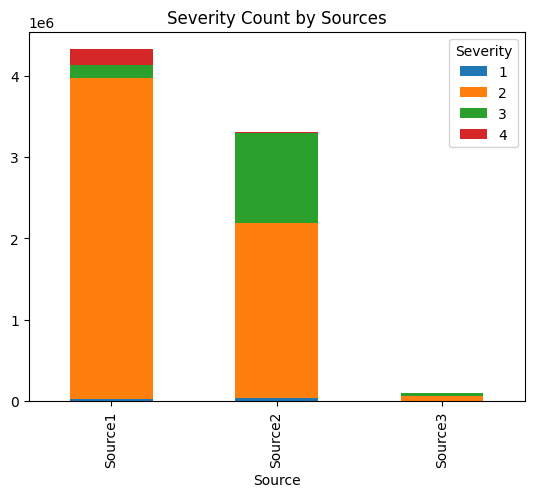

In [5]:
df_source = df.groupby(['Severity','Source']).size().reset_index().pivot(\
    columns='Severity', index='Source', values=0)
df_source.plot(kind='bar', stacked=True, title='Severity Count by Sources')

In [14]:
# fix datetime type
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors="coerce")
df['End_Time'] = pd.to_datetime(df['End_Time'], errors="coerce")
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], errors="coerce")
df.dropna(subset=['Start_Time'], inplace=True)
# calculate duration as the difference between end time and start time in minute
df['Duration'] = df['End_Time'] - df['Start_Time']
df['Duration'] = df['Duration'].apply(lambda x:round(x.total_seconds() / 60) )
print("The overall mean duration is: ", (round(df['Duration'].mean(),3)), 'min')

The overall mean duration is:  426.926 min


In [23]:
# Verify that the Severity column contains valid values
print("Unique values in Severity column:", df['Severity'].unique())

# Check for NaN values in the Duration column
nan_duration_count = df['Duration'].isnull().sum()
print("Number of NaN values in Duration column:", nan_duration_count)

# Confirm the number of data points before and after applying the filtering condition
print("Number of data points before filtering:", len(df))
filtered_df = df.loc[(df['Source'] == "Source2") & (df['Duration'] < 600), :]
print("Number of data points after filtering:", len(filtered_df))


Unique values in Severity column: [3 2 1 4]
Number of NaN values in Duration column: 0
Number of data points before filtering: 6985228
Number of data points after filtering: 3304245


c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

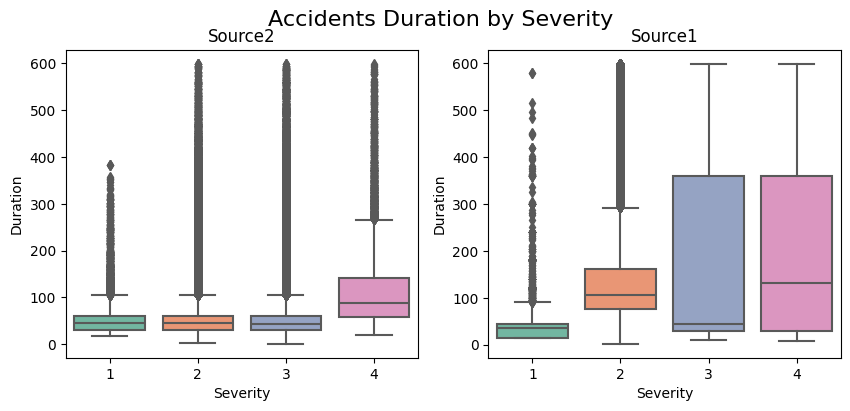

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Source2") & (df['Duration']<600),], palette="Set2", ax=axs[0])
axs[0].set_title('Source2')
fig.suptitle('Accidents Duration by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Duration",
            data=df.loc[(df['Source']=="Source1") & (df['Duration']<600),], palette="Set2", ax=axs[1])
axs[1].set_title('Source1')
plt.show()

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

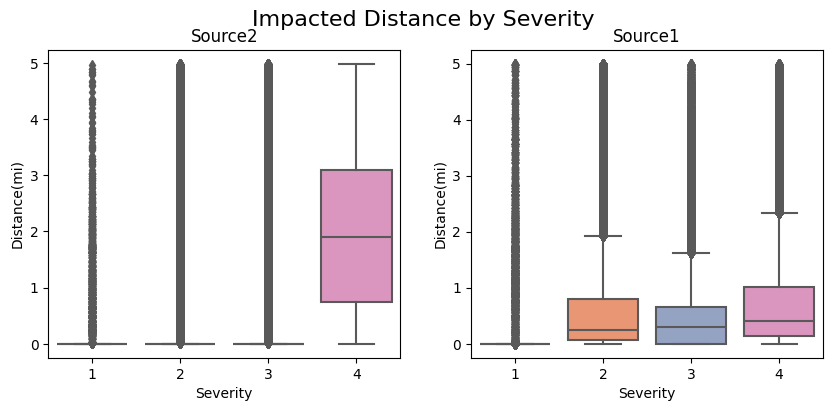

In [27]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
sns.boxplot(x="Severity", y="Distance(mi)", 
            data=df.loc[(df['Source']=="Source2") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[0])
axs[0].set_title('Source2')
fig.suptitle('Impacted Distance by Severity', fontsize=16)
sns.boxplot(x="Severity", y="Distance(mi)",
            data=df.loc[(df['Source']=="Source1") & (df['Distance(mi)']<5),], palette="Set2", ax=axs[1])
axs[1].set_title('Source1')
plt.show()

In [28]:
df = df.loc[df['Source']=="Source2",]
df = df.drop(['Source'], axis=1)
print("The shape of data is:",(df.shape))

The shape of data is: (3305373, 46)


In [30]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Duration'],
      dtype='object')

In [31]:
df = df.drop(['ID','Description','Distance(mi)', 'End_Time', 'Duration', 
              'End_Lat', 'End_Lng'], axis=1)

In [35]:
cat_names = ['Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Weather_Condition', 'Amenity', 'Bump', 'Crossing']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3
Weather_Condition 131
Amenity 2
Bump 2
Crossing 2


In [36]:
df = df.drop(['Country','Turning_Loop'], axis=1)

In [37]:
print("Wind Direction: ", df['Wind_Direction'].unique())


Wind Direction:  ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [38]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['CALM' 'SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' nan]


In [39]:
# show distinctive weather conditions 
weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drizzle', 'Dust', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Smoke', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Showers', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 

In [40]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), True, False)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), True, False)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), True, False)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), True, False)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), True, False)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), True, False)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), True, False)

In [41]:
# Assign NA to created weather features where 'Weather_Condition' is null.
weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
    df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
    df[i] = df[i].astype('bool')

df.loc[:,['Weather_Condition'] + weather]

df = df.drop(['Weather_Condition'], axis=1)

C:\Users\Темирлан\AppData\Local\Temp\ipykernel_6572\385117552.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
C:\Users\Темирлан\AppData\Local\Temp\ipykernel_6572\385117552.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']
C:\Users\Темирлан\AppData\Local\Temp\ipykernel_6572\385117552.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas.

In [42]:
# average difference between weather time and start time
print("Mean difference between 'Start_Time' and 'Weather_Timestamp': ", 
(df.Weather_Timestamp - df.Start_Time).mean())

Mean difference between 'Start_Time' and 'Weather_Timestamp':  0 days 00:00:33.576478407


In [43]:
df = df.drop(["Weather_Timestamp"], axis=1)

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month
df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 05:46:00,2016,2,0,39,5,346.0
1,2016-02-08 06:07:59,2016,2,0,39,6,367.0
2,2016-02-08 06:49:27,2016,2,0,39,6,409.0
3,2016-02-08 07:23:34,2016,2,0,39,7,443.0
4,2016-02-08 07:39:07,2016,2,0,39,7,459.0


In [44]:
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Street,0.049162
5,City,0.001845
8,Zipcode,0.013191
9,Timezone,0.084680
10,Airport_Code,0.196226
11,Temperature(F),1.683471
12,Wind_Chill(F),43.565643
13,Humidity(%),1.798980
14,Pressure(in),1.442046
15,Visibility(mi),1.924957


In [45]:
df = df.drop(['Wind_Chill(F)'], axis=1)

In [46]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.02,0
1,0.00,0
2,0.00,1
3,0.00,1
4,0.00,1
5,0.03,0


In [47]:
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [50]:
# Group data by 'Airport_Code' and 'Start_Month' then fill NAs with median value
Weather_data = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

print("The number of remaining missing values: ")
for column in Weather_data:
    # Calculate the median for each group
    median_values = df.groupby(['Airport_Code', 'Month'])[column].transform('median')
    
    # Fill NaN values with the corresponding median value
    df[column] = df[column].fillna(median_values)
    
    # Check the remaining missing values
    print(column + " : " + str(df[column].isnull().sum()))


The number of remaining missing values: 
Temperature(F) : 6247
Humidity(%) : 6270
Pressure(in) : 6224
Visibility(mi) : 14298
Wind_Speed(mph) : 14238


In [51]:
df = df.dropna(subset=Weather_data)

In [53]:
from collections import Counter

# Define the weather categories
weather_cat = ['Wind_Direction'] + weather

print("Count of missing values that will be dropped: ")
for column in weather_cat:
    # Calculate the majority value for each group
    majority_values = df.groupby(['Airport_Code', 'Month'])[column].transform(lambda x: Counter(x).most_common(1)[0][0])
    
    # Fill NaN values with the corresponding majority value
    df[column].fillna(majority_values, inplace=True)
    
    # Check the remaining missing values
    print(column + " : " + str(df[column].isnull().sum()))

# Drop rows with any remaining missing values in weather_cat columns
df.dropna(subset=weather_cat, inplace=True)


Count of missing values that will be dropped: 
Wind_Direction : 10402
Clear : 0
Cloud : 0
Rain : 0
Heavy_Rain : 0
Snow : 0
Heavy_Snow : 0
Fog : 0


In [54]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()

Severity4
0    3258507
1      13939
Name: count, dtype: int64

In [55]:
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                   dat[dat[col]==0].sample(n)], axis=0)

In [56]:
df_bl = resample(df, 'Severity4', 50000)
print('resampled data:', df_bl.Severity4.value_counts())

resampled data: Severity4
1    50000
0    50000
Name: count, dtype: int64


c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

AttributeError: 'numpy.int64' object has no attribute 'startswith'

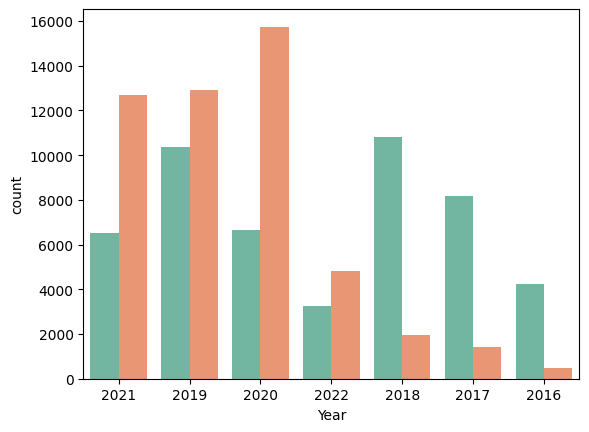

In [60]:
df_bl.Year = df_bl.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

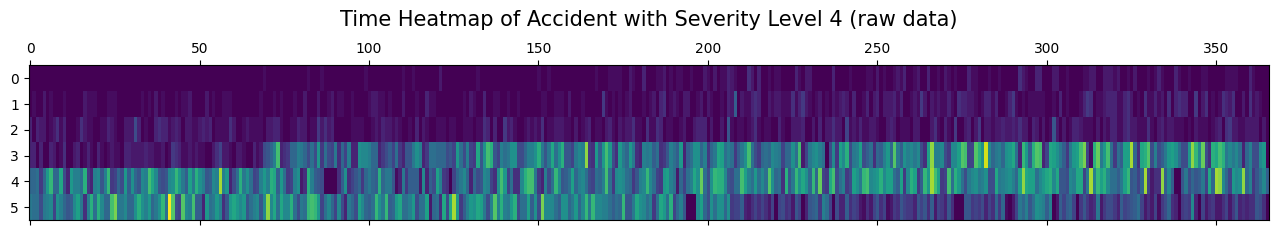

In [62]:
# create a dataframe used to plot heatmap
df_date = df.loc[:,['Start_Time','Severity4']]         # create a new dateframe only containing time and severity
df_date['date'] = df_date['Start_Time'].dt.normalize() # keep only the date part of start time
df_date = df_date.drop(['Start_Time'], axis = 1)
df_date = df_date.groupby('date').sum()                # sum the number of accidents with severity level 4 by date
df_date = df_date.reset_index().drop_duplicates()

# join the dataframe with full range of date from 2016 to 2020
full_date = pd.DataFrame(pd.date_range(start="2016-01-02",end="2021-12-31"))    
df_date = full_date.merge(df_date, how = 'left',left_on = 0, right_on = 'date')
df_date['date'] = df_date.iloc[:,0]
df_date = df_date.fillna(0)
df_date = df_date.iloc[:,1:].set_index('date')

# group by date
groups = df_date['Severity4'].groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    if name.year != 2020:
        years[name.year] = np.append(group.values,0)
    else:
        years[name.year] = group.values
  

# plot
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.title('Time Heatmap of Accident with Severity Level 4 (raw data)', y=1.2, fontsize=15)
plt.show()

In [63]:
df = df.loc[df['Start_Time'] > "2019-03-10",:]
df = df.drop(['Year', 'Start_Time'], axis=1)
df['Severity4'].value_counts()

Severity4
0    1608398
1      12751
Name: count, dtype: int64

In [64]:
df_bl = resample(df, 'Severity4', 20000)

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

AttributeError: 'numpy.int64' object has no attribute 'startswith'

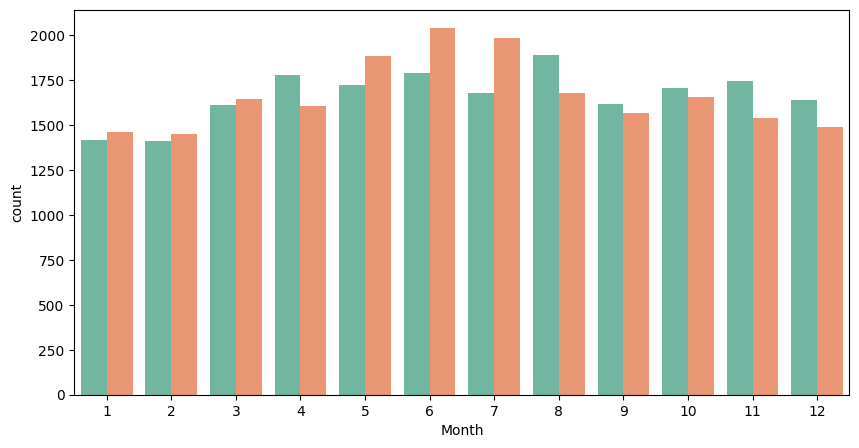

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

AttributeError: 'numpy.int64' object has no attribute 'startswith'

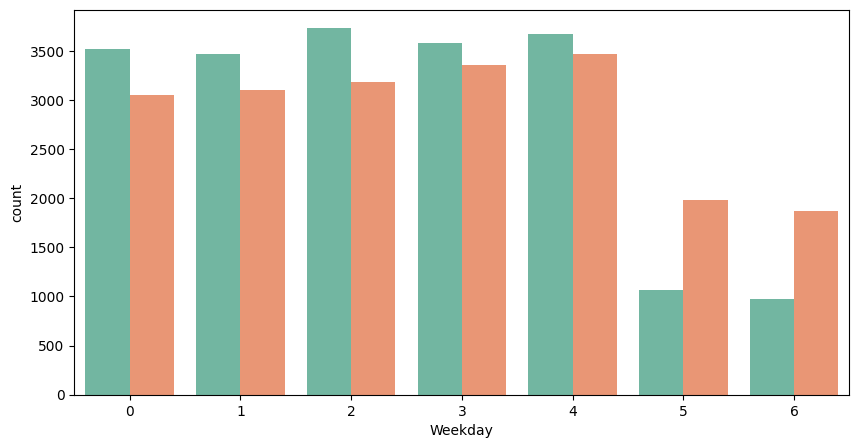

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Weedday (resampled data)', size=15, y=1.05)
plt.show()

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_d

AttributeError: 'numpy.int64' object has no attribute 'startswith'

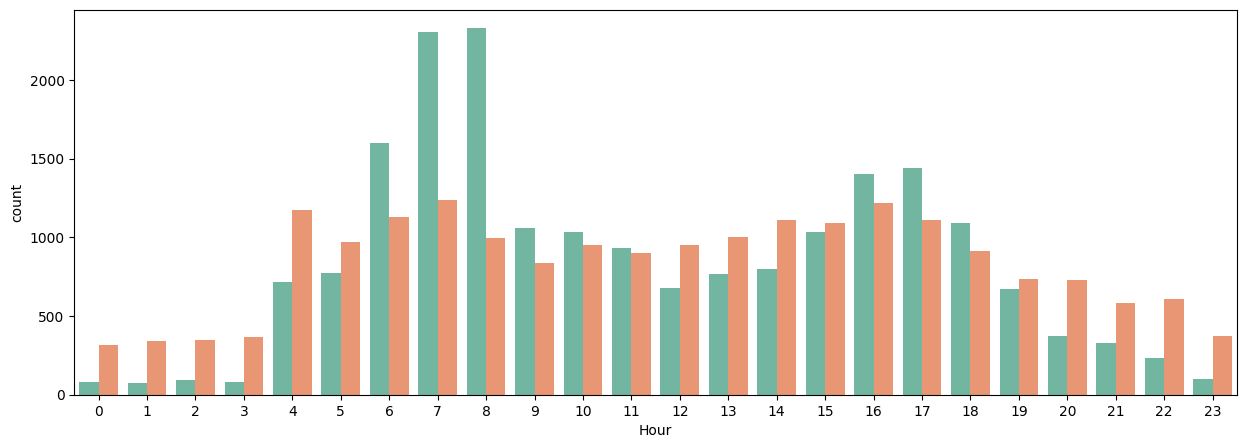

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_bl ,palette="Set2")
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


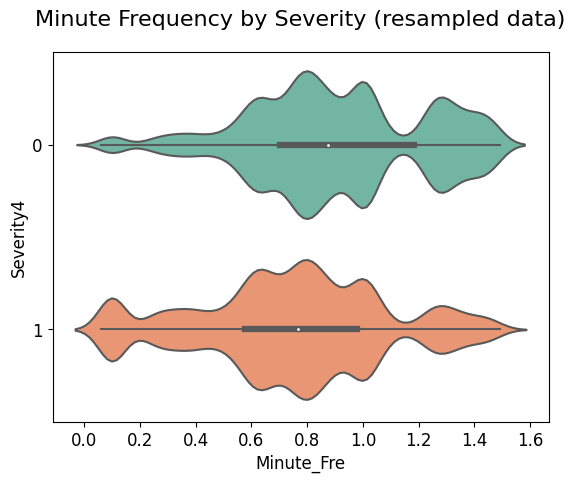

In [69]:
# frequence encoding and log-transform
df['Minute_Freq'] = df.groupby(['Minute'])['Minute'].transform('count')
df['Minute_Freq'] = df['Minute_Freq']/df.shape[0]*24*60
df['Minute_Freq'] = df['Minute_Freq'].apply(lambda x: np.log(x+1))

# resampling
df_bl = resample(df, 'Severity4', 20000)

# plot
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
sns.violinplot(x='Minute_Freq', y="Severity4", data=df_bl, palette="Set2")    
plt.xlabel('Minute_Fre', size=12, labelpad=3)
plt.ylabel('Severity4', size=12, labelpad=3)    
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Minute Frequency by Severity (resampled data)', size=16, y=1.05)
plt.show()

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'int' object has no attribute 'startswith'

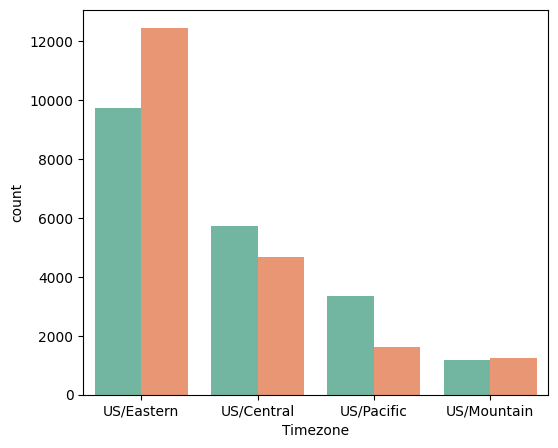

In [70]:
plt.figure(figsize=(6,5))
chart = sns.countplot(x='Timezone', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents by Timezone (resampled data)", size=15, y=1.05)
plt.show()

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'int' object has no attribute 'startswith'

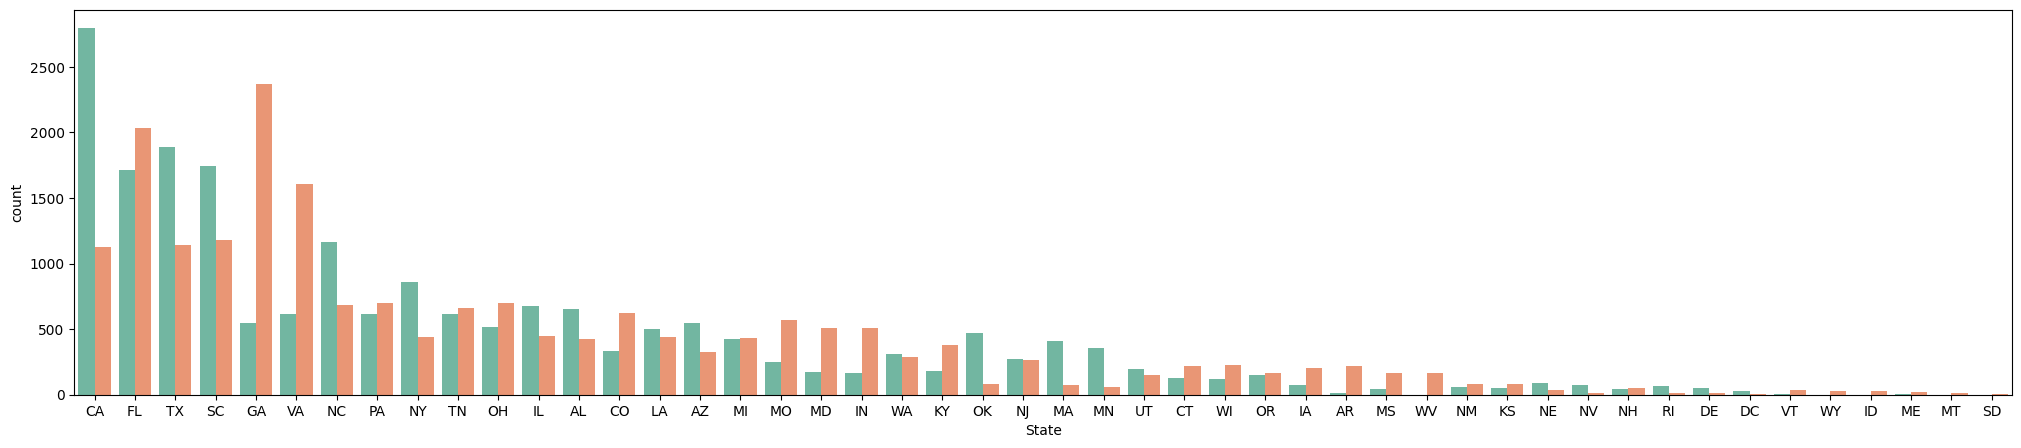

In [71]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', 
                      data=df_bl ,palette="Set2", order=df_bl['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by accidents' count (resampled data)", size=15, y=1.05)
plt.show()

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'int' object has no attribute 'startswith'

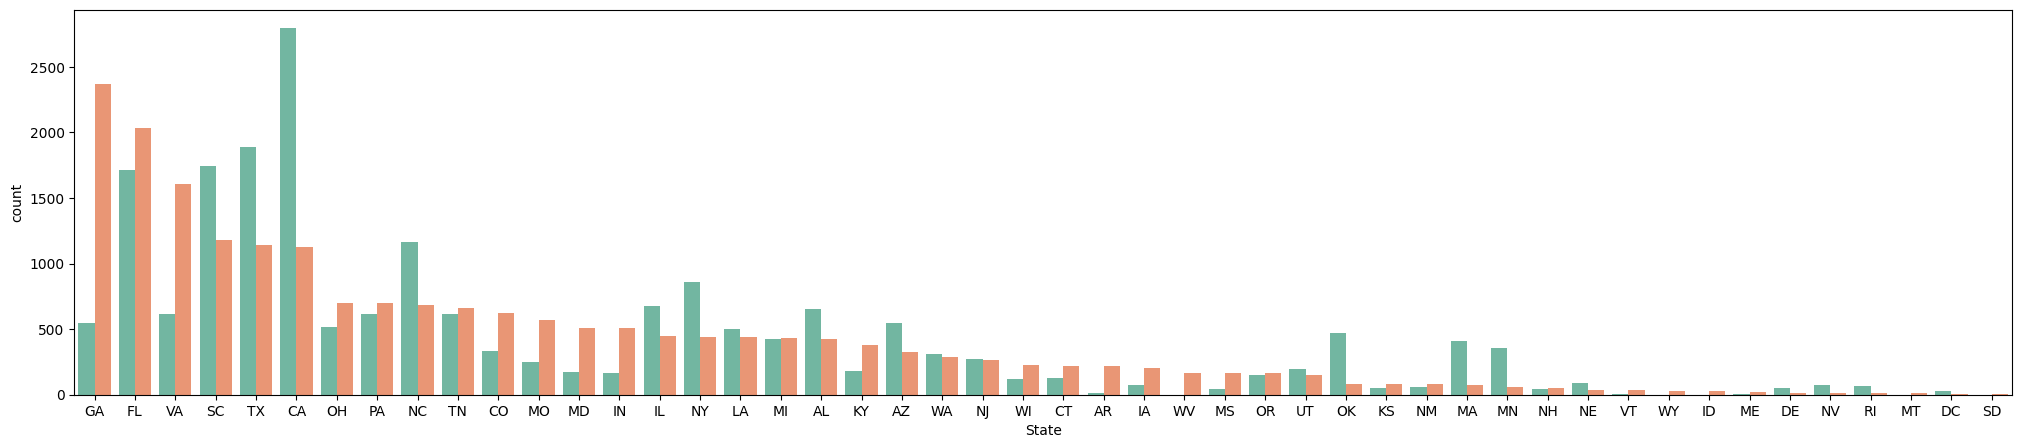

In [72]:
plt.figure(figsize=(25,5))
chart = sns.countplot(x='State', hue='Severity4', data=df_bl ,palette="Set2", order=df_bl[df_bl['Severity4']==1]['State'].value_counts().index)
plt.title("Count of Accidents in State\nordered by serious accidents' count (resampled data)", size=15, y=1.05)
plt.show()

In [73]:
!pip install -q censusdata
import censusdata

# download data
county = censusdata.download('acs5', 2018, censusdata.censusgeo([('county', '*')]),
                                   ['DP05_0001E',  'DP03_0019PE','DP03_0021PE','DP03_0022PE','DP03_0062E'],
                                   tabletype='profile')
# rename columns
county.columns = ['Population_County','Drive_County','Transit_County','Walk_County','MedianHouseholdIncome_County']
county = county.reset_index()
# extract county name and state name
county['County_y'] = county['index'].apply(lambda x : x.name.split(' County')[0].split(',')[0]).str.lower()
county['State_y'] = county['index'].apply(lambda x : x.name.split(':')[0].split(', ')[1])

In [74]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
county['State_y'] = county['State_y'].replace(us_state_abbrev)

In [75]:
county.head()

,index,Population_County,Drive_County,Transit_County,Walk_County,MedianHouseholdIncome_County,County_y,State_y
0,"Petersburg Borough, Alaska: Summary level: 050...",3255,48.8,0.9,20.5,66907,petersburg borough,AK
1,"Kusilvak Census Area, Alaska: Summary level: 0...",8198,4.9,0.1,41.2,35539,kusilvak census area,AK
2,"Maricopa County, Arizona: Summary level: 050, ...",4253913,76.3,2.1,1.5,61606,maricopa,AZ
3,"Graham County, Arizona: Summary level: 050, st...",37879,79.6,0.3,2.1,51352,graham,AZ
4,"Santa Cruz County, Arizona: Summary level: 050...",46584,84.6,0.3,1.4,40467,santa cruz,AZ


In [76]:
df.shape

(1621149, 47)

In [77]:
# convert all county name to lowercase 
df['County'] = df['County'].str.lower()

# left join df with census data
df = df.merge(county, left_on = ['County','State'], right_on=['County_y','State_y'],how = 'left').drop(['County_y','State_y'], axis = 1)
join_var = county.columns.to_list()[:-2]

# check how many miss match we got
print('Count of missing values before: ', df[join_var].isnull().sum())

# add "city" and match again
df_city = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_city['County_city'] = df_city['County'].apply(lambda x : x + ' city')
df_city = df_city.merge(county,left_on= ['County_city','State'],right_on = ['County_y','State_y'], how = 'left').drop(['County_city','County_y','State_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_city), axis=0)

# add "parish" and match again
df_parish = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_parish['County_parish'] = df_parish['County'].apply(lambda x : x + ' parish')
df_parish = df_parish.merge(county,left_on= ['County_parish','State'],right_on = ['County_y','State_y'], how = 'left').drop(['County_parish','County_y','State_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_parish), axis=0)
print('Count of missing values after: ', df[join_var].isnull().sum())

Count of missing values before:  index                           66849
Population_County               66849
Drive_County                    66849
Transit_County                  66849
Walk_County                     66849
MedianHouseholdIncome_County    66849
dtype: int64
Count of missing values after:  index                           16912
Population_County               16912
Drive_County                    16912
Transit_County                  16912
Walk_County                     16912
MedianHouseholdIncome_County    16912
dtype: int64


In [78]:
# drop na
df = df.drop('index', axis = 1).dropna()

# log-transform
for i in ['Population_County','Transit_County','Walk_County']:
    df[i + '_log'] = df[i].apply(lambda x: np.log(x+1))
df = df.drop(['Population_County','Transit_County','Walk_County'], axis = 1)

In [80]:
# create a list of top 40 most common words in street name
st_type =' '.join(df['Street'].unique().tolist()) # flat the array of street name
st_type = re.split(" |-", st_type) # split the long string by space and hyphen
st_type = [x[0] for x in Counter(st_type).most_common(40)] # select the 40 most common words
print('the 40 most common words')
print(*st_type, sep = ", ") 

the 40 most common words
Rd, Dr, St, Ave, N, S, E, W, Ln, Blvd, Highway, Way, Ct, Pkwy, Hwy, NE, SW, Pl, NW, SE, State, Old, Road, Cir, US, Creek, County, Hill, Park, Lake, Route, I, Trl, Valley, Ridge, Mill, River, Loop, Oak, Ter


In [81]:
# Remove some irrelevant words and add spaces and hyphen back
st_type= [' Rd', ' St', ' Dr', ' Ave', ' Blvd', ' Ln', ' Highway', ' Pkwy', ' Hwy', 
          ' Way', ' Ct', 'Pl', ' Road', 'US-', 'Creek', ' Cir',  'Route', 
          'I-', 'Trl', 'Pike', ' Fwy']
print(*st_type, sep = ", ")  

 Rd,  St,  Dr,  Ave,  Blvd,  Ln,  Highway,  Pkwy,  Hwy,  Way,  Ct, Pl,  Road, US-, Creek,  Cir, Route, I-, Trl, Pike,  Fwy


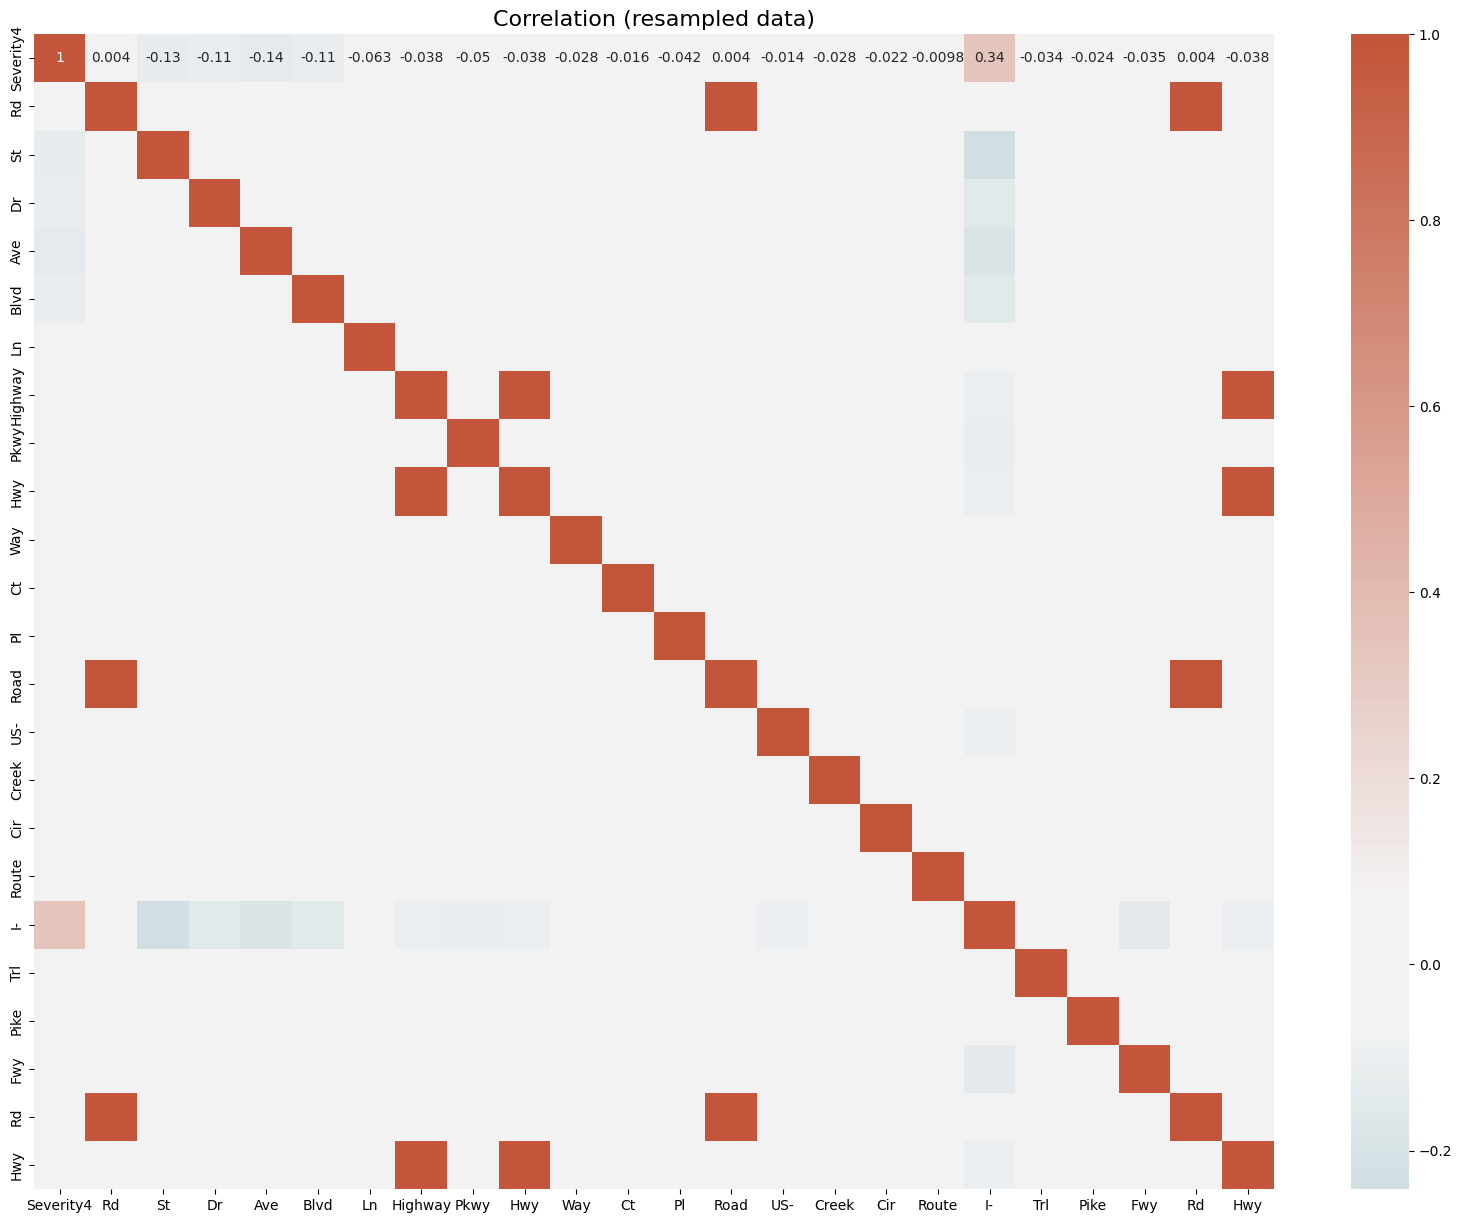

In [83]:
# Initialize boolean columns
for i in st_type:
    df[i.strip()] = np.where(df['Street'].str.contains(i, case=True, na=False), True, False)
df['Rd'] = False
df['Hwy'] = False

# Set boolean values for 'Rd' and 'Hwy' columns
df.loc[df['Road'] == 1, 'Rd'] = True
df.loc[df['Highway'] == 1, 'Hwy'] = True

# Resample again
df_bl = resample(df, 'Severity4', 20000)

# Plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
street_corr = df_bl.loc[:, ['Severity4'] + [x.strip() for x in st_type] + ['Rd', 'Hwy']].corr()
plt.figure(figsize=(20, 15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title("Correlation (resampled data)", fontsize=16)
plt.show()


In [84]:
drop_list = street_corr.index[street_corr['Severity4'].abs()<0.1].to_list()
df = df.drop(drop_list, axis=1)

# resample again
df_bl = resample(df, 'Severity4', 20000)

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Темирлан\AppData\Local\Programs\Py

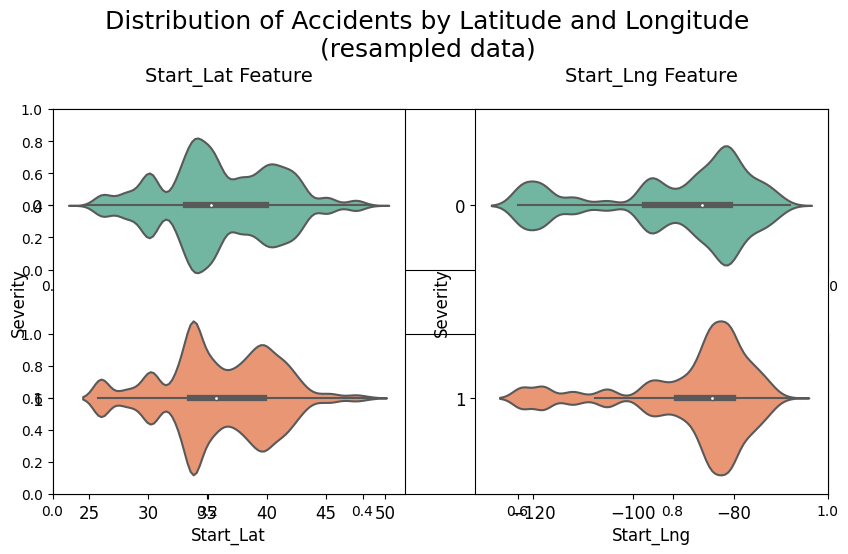

In [86]:
df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Start_Lat', 'Start_Lng']
fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 5))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(1, 2, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Distribution of Accidents by Latitude and Longitude\n(resampled data)', fontsize=18,y=1.08)
plt.show()

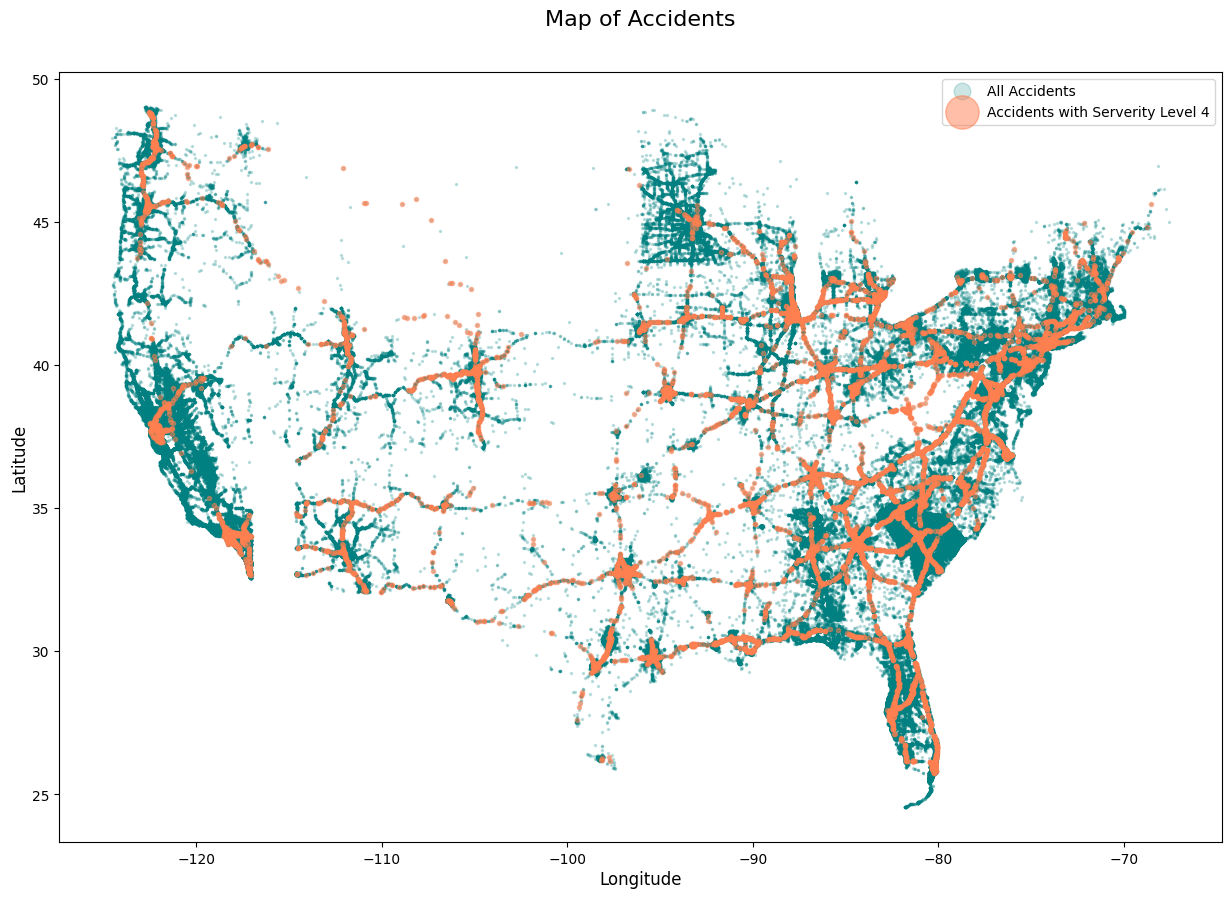

In [87]:
df_4 = df[df['Severity4']==1]

plt.figure(figsize=(15,10))

plt.plot( 'Start_Lng', 'Start_Lat', data=df, linestyle='', marker='o', markersize=1.5, color="teal", alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=df_4, linestyle='', marker='o', markersize=3, color="coral", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

In [88]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code','State']
for i in fre_list:
  newname = i + '_Freq'
  df[newname] = df.groupby([i])[i].transform('count')
  df[newname] = df[newname]/df.shape[0]*df[i].unique().size
  df[newname] = df[newname].apply(lambda x: np.log(x+1))

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Темирлан\AppData\Local\Programs\Py

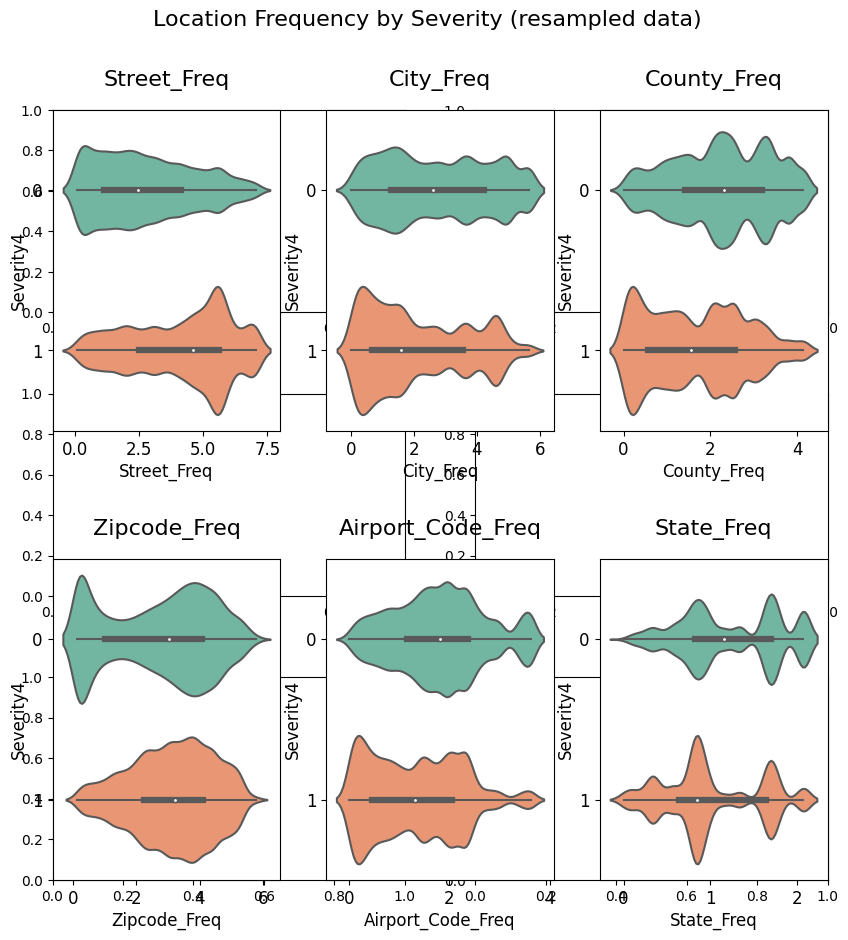

In [89]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
fig.suptitle('Location Frequency by Severity (resampled data)', fontsize=16)
for i, feature in enumerate(fre_list, 1): 
    feature = feature + '_Freq'   
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity4', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{}'.format(feature), size=16, y=1.05)
plt.show()

In [90]:
df = df.drop(fre_list, axis  = 1)

In [91]:
df['Pressure_bc']= boxcox(df['Pressure(in)'].apply(lambda x: x+1),lmbda=6)
df['Visibility_bc']= boxcox(df['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
df['Wind_Speed_bc']= boxcox(df['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
df = df.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Темирлан\AppData\Local\Programs\Py

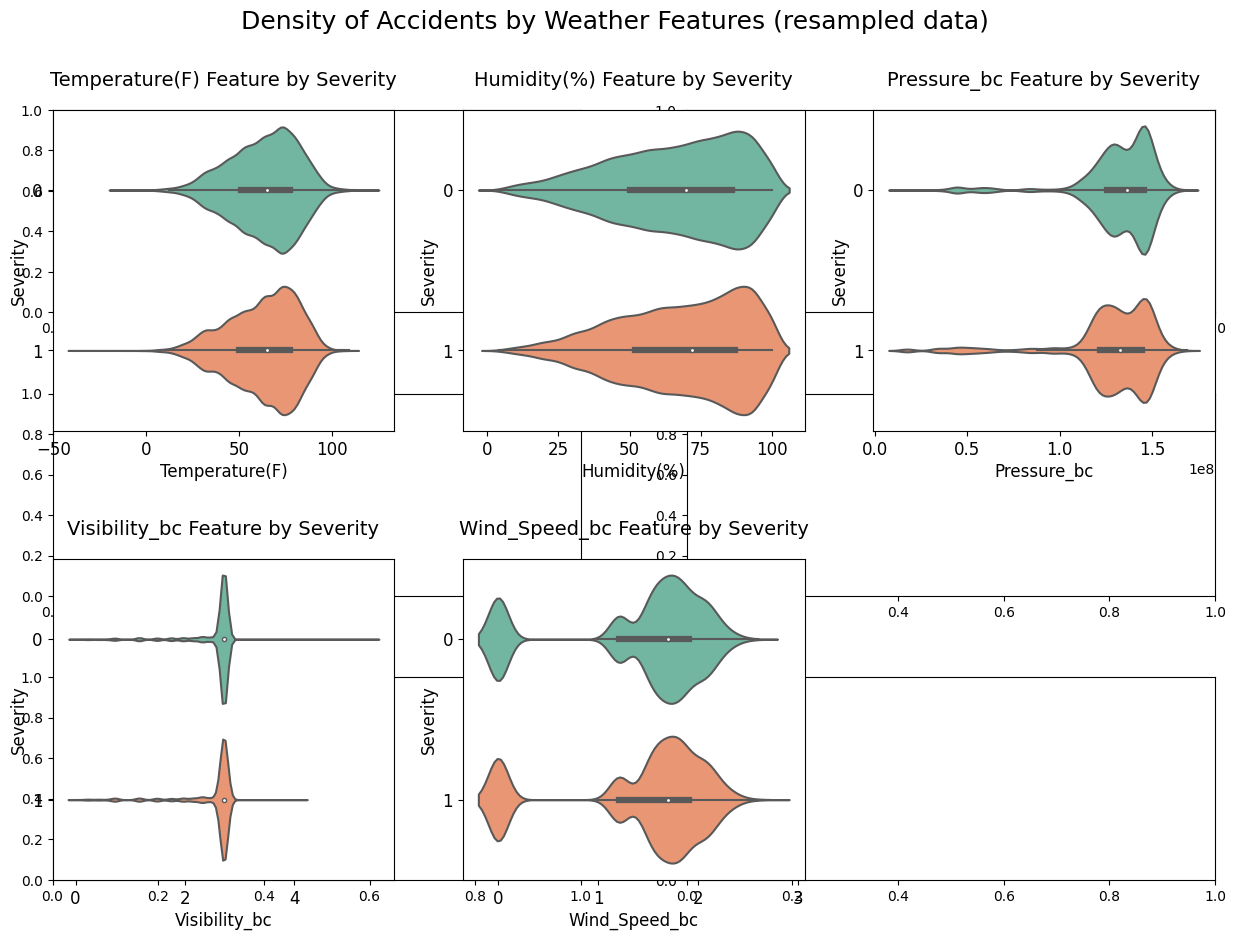

In [92]:
# resample again
df_bl = resample(df, 'Severity4', 20000)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc']
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature by Severity'.format(feature), size=14, y=1.05)
fig.suptitle('Density of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

In [96]:
df = df.drop(['Heavy_Rain','Heavy_Snow','Fog'], axis  = 1)

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


AttributeError: 'int' object has no attribute 'startswith'

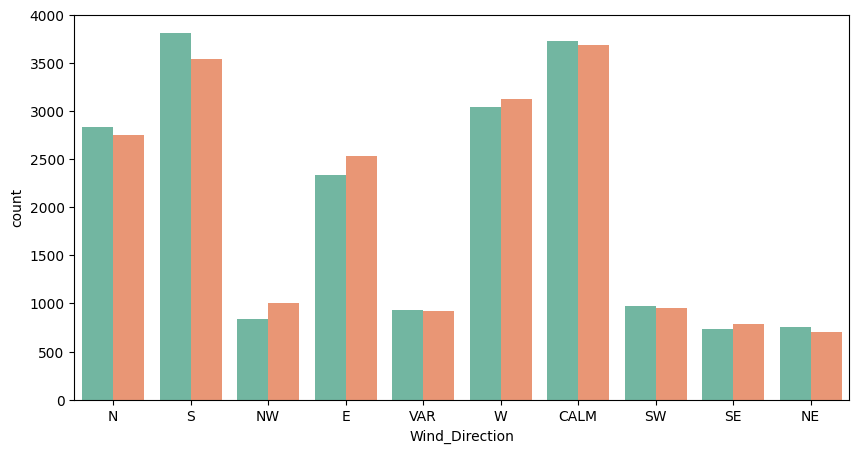

In [97]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Wind_Direction', hue='Severity4', data=df_bl ,palette="Set2")
plt.title("Count of Accidents in Wind Direction (resampled data)", size=15, y=1.05)
plt.show()

In [98]:
df = df.drop(['Wind_Direction'], axis=1)

In [100]:
df= df.drop(['Amenity','Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

In [101]:
# one-hot encoding
df[period_features] = df[period_features].astype('category')
df = pd.get_dummies(df, columns=period_features, drop_first=True)

In [103]:
df = df.drop(['Temperature(F)', 'Humidity(%)', 'Precipitation(in)', 'Precipitation_NA','Visibility_bc', 'Wind_Speed_bc',
              'Clear','Cloud','Snow','Crossing','Junction','Railway','Month',
              'Hour', 'Day','Minute','MedianHouseholdIncome_County', 'Transit_County_log', 
              'Walk_County_log','Drive_County', 'City_Freq','County_Freq','Airport_Code_Freq','Zipcode_Freq',
              'Sunrise_Sunset_Night', 'Civil_Twilight_Night', 'Nautical_Twilight_Night'], axis=1)

In [106]:
df = df.replace([True, False], [1,0])

cat = ['Timezone','Weekday']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

df_int = df.select_dtypes(include=['int']).apply(pd.to_numeric,downcast='unsigned')
df_float = df.select_dtypes(include=['float']).apply(pd.to_numeric,downcast='float')
df = pd.concat([df.select_dtypes(include=['uint8']),df_int,df_float],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1602744 entries, 0 to 58526
Data columns (total 18 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Station                      1602744 non-null  uint8  
 1   Stop                         1602744 non-null  uint8  
 2   Traffic_Signal               1602744 non-null  uint8  
 3   Rain                         1602744 non-null  uint8  
 4   Severity4                    1602744 non-null  uint8  
 5   St                           1602744 non-null  uint8  
 6   Dr                           1602744 non-null  uint8  
 7   Ave                          1602744 non-null  uint8  
 8   Blvd                         1602744 non-null  uint8  
 9   I-                           1602744 non-null  uint8  
 10  Astronomical_Twilight_Night  1602744 non-null  uint8  
 11  Start_Lat                    1602744 non-null  float32
 12  Start_Lng                    1602744 non-null  fl

In [108]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [109]:
# split X, y
X = df.drop('Severity4', axis=1)
y= df['Severity4']

# split train, test
X_train, X_test, y_train, y_test = train_test_split(\
  X, y, test_size=0.30, random_state=42)

In [112]:
# Randomly undersample majority class to about 10 times of minority class
rus = RandomUnderSampler(sampling_strategy = 0.1, random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 1113172, 1: 8748})
Distribution of class labels after resampling Counter({0: 87480, 1: 8748})


In [115]:
clf_base = LogisticRegression()
grid = {'C': 10.0 ** np.arange(-2, 3),
        'penalty': ['l2'],
        'class_weight': ['balanced']}
clf_lr = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_lr.fit(X_train_res, y_train_res)

coef = clf_lr.best_estimator_.coef_
intercept = clf_lr.best_estimator_.intercept_
print (classification_report(y_test, clf_lr.predict(X_test)))

c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    477106
           1       0.00      0.00      0.00      3718

    accuracy                           0.99    480824
   macro avg       0.50      0.50      0.50    480824
weighted avg       0.98      0.99      0.99    480824



c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
clf_base = RandomForestClassifier()
grid = {'n_estimators': [10, 50, 100],
        'max_features': ['sqrt', 'log2', None]}
clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_rf.fit(X_train_res, y_train_res)
y_pred = clf_rf.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    477106
           1       0.08      0.26      0.12      3718

    accuracy                           0.97    480824
   macro avg       0.54      0.62      0.56    480824
weighted avg       0.99      0.97      0.98    480824



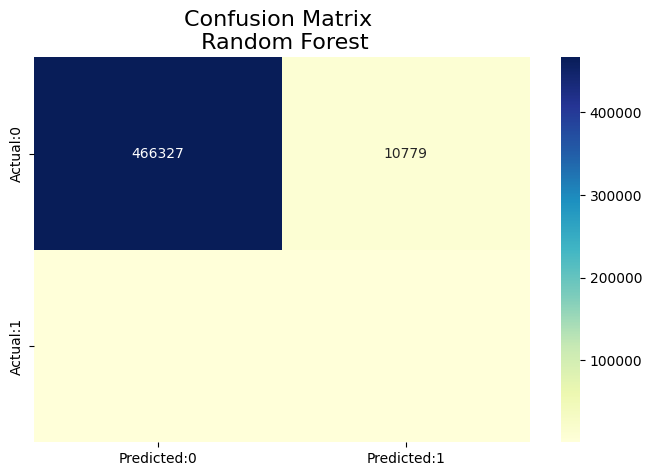

In [118]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu").set_title(
    "Confusion Matrix \n Random Forest", fontsize=16)
plt.show()

In [120]:
# Randomly undersample majority class to about 20 times of minority class
rus = RandomUnderSampler(sampling_strategy = 0.05, random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 1113172, 1: 8748})
Distribution of class labels after resampling Counter({0: 174960, 1: 8748})


In [122]:
clf_base = RandomForestClassifier()
grid = {'n_estimators': [10, 50, 100],
        'max_features': ['sqrt', 'log2', None]}
clf_rf = GridSearchCV(clf_base, grid, cv=5, n_jobs=8, scoring='f1_macro')

clf_rf.fit(X_train_res, y_train_res)
y_pred = clf_rf.predict(X_test)

print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    477106
           1       0.13      0.15      0.14      3718

    accuracy                           0.99    480824
   macro avg       0.56      0.57      0.57    480824
weighted avg       0.99      0.99      0.99    480824



c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Темирлан\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


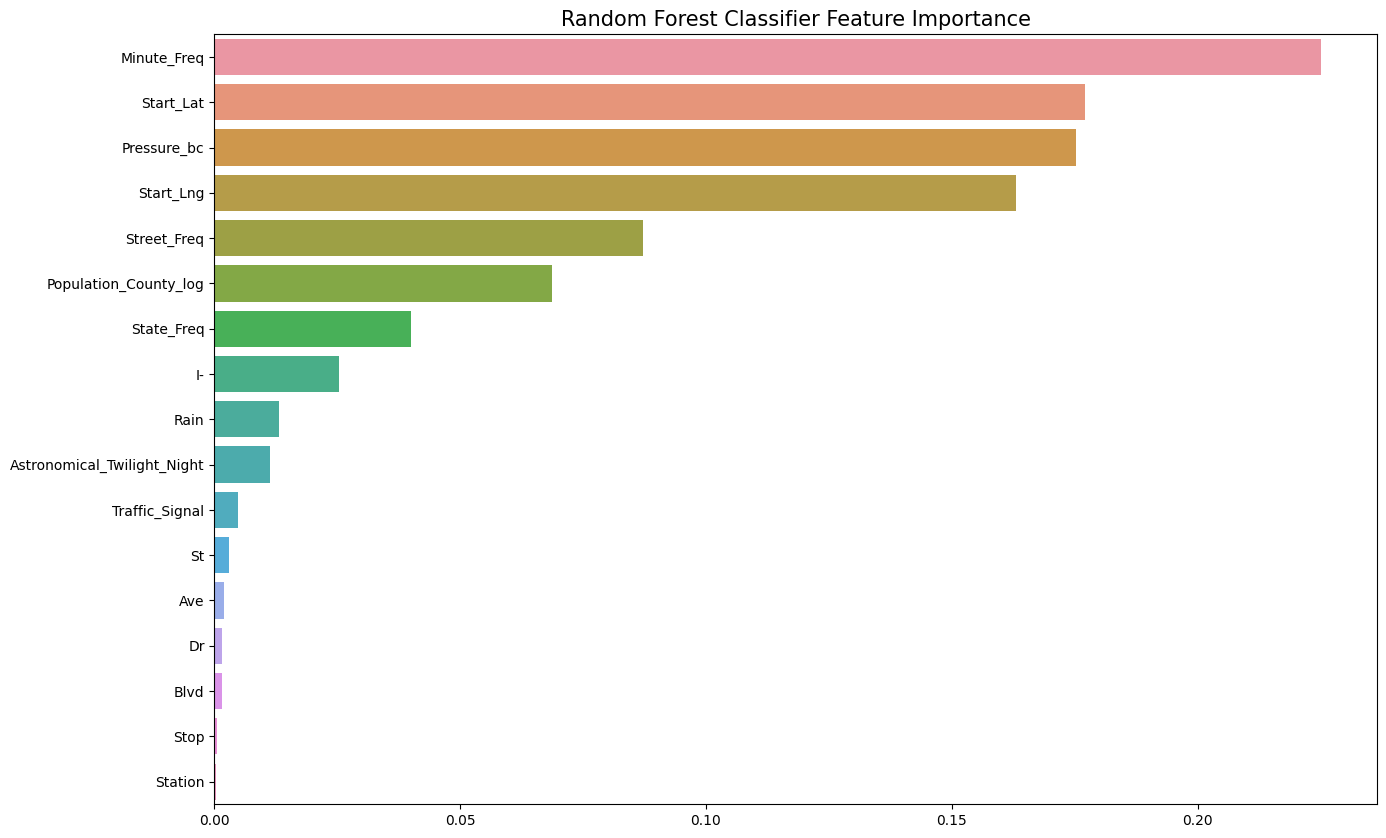

In [123]:
importances = pd.DataFrame(np.zeros((X_train_res.shape[1], 1)), columns=['importance'], index=df.drop('Severity4',axis=1).columns)

importances.iloc[:,0] = clf_rf.best_estimator_.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier Feature Importance', size=15)

plt.show()